In [2]:
from create_dataset import load_timeseries_data, drop_zero_columns, remove_lunch_break_data
from feature_engineering import create_features
import datetime
import pandas as pd

stock_symbols = ["002521"]
df = load_timeseries_data(stock_symbol=stock_symbols)
df = remove_lunch_break_data(df)
df = drop_zero_columns(df)
df = create_features(df)
df_june = df[(df['TradingDay']>=datetime.datetime(2022, 6, 1)) & (df['TradingDay']<=datetime.datetime(2022, 6, 30))]
df_july = df[(df['TradingDay']>=datetime.datetime(2022, 7, 1)) & (df['TradingDay']<=datetime.datetime(2022, 7, 31))]
df_august = df[(df['TradingDay']>=datetime.datetime(2022, 8, 1)) & (df['TradingDay']<=datetime.datetime(2022, 8, 31))]
df_september = df[(df['TradingDay']>=datetime.datetime(2022, 9, 1)) & (df['TradingDay']<=datetime.datetime(2022, 9, 30))]

used_df = df_june
df_filtered =used_df[(used_df['InstrumentID']==int(stock_symbols[0])) & (used_df['TradingDay']==datetime.datetime(2022, 6, 28))]


Column 'ClosePrice' has only zeros
Column 'HighestPrice' has only zeros
Column 'LowerLimitPrice' has only zeros
Column 'LowestPrice' has only zeros
Column 'OpenPrice' has only zeros
Column 'PreClosePrice' has only zeros
Column 'PreSettlPrice' has only zeros
Column 'SettlPrice' has only zeros
Column 'TradesCount' has only zeros
Column 'UpperLimitPrice' has only zeros

Columns with only zeros: ['ClosePrice', 'HighestPrice', 'LowerLimitPrice', 'LowestPrice', 'OpenPrice', 'PreClosePrice', 'PreSettlPrice', 'SettlPrice', 'TradesCount', 'UpperLimitPrice']


c:\Users\Yu\Time Series Data 194\feature_engineering.py:70: RuntimeWarning: divide by zero encountered in divide
  returns = (shifted.values-df.values) / df.values
c:\Users\Yu\Time Series Data 194\feature_engineering.py:70: RuntimeWarning: invalid value encountered in divide
  returns = (shifted.values-df.values) / df.values
c:\Users\Yu\Time Series Data 194\feature_engineering.py:70: RuntimeWarning: divide by zero encountered in divide
  returns = (shifted.values-df.values) / df.values
c:\Users\Yu\Time Series Data 194\feature_engineering.py:70: RuntimeWarning: invalid value encountered in divide
  returns = (shifted.values-df.values) / df.values
c:\Users\Yu\Time Series Data 194\feature_engineering.py:70: RuntimeWarning: divide by zero encountered in divide
  returns = (shifted.values-df.values) / df.values
c:\Users\Yu\Time Series Data 194\feature_engineering.py:70: RuntimeWarning: invalid value encountered in divide
  returns = (shifted.values-df.values) / df.values
c:\Users\Yu\Time Se

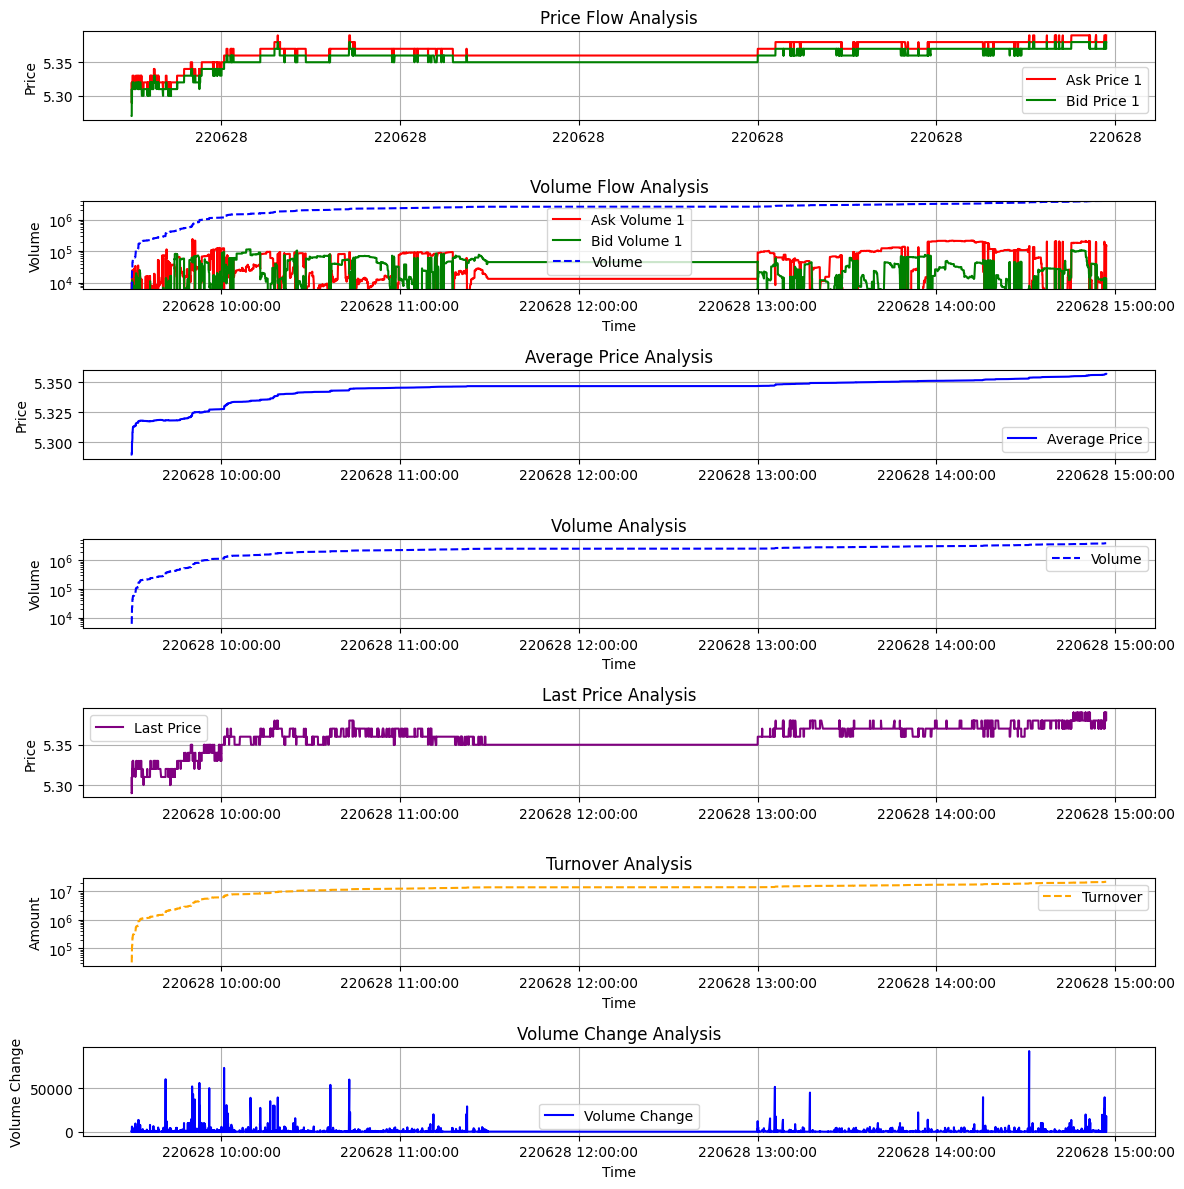

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig2, (ax1, ax2, ax3, ax4, ax5, ax6, ax8) = plt.subplots(7, 1, figsize=(12, 12))

# Price Analysis Plot (top subplot)
ax1.plot(df_filtered['DataTime'], df_filtered['AskPrice1'], color='red', label='Ask Price 1')
ax1.plot(df_filtered['DataTime'], df_filtered['BidPrice1'], color='green', label='Bid Price 1')
ax1.set_title('Price Flow Analysis')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d'))

# Volume Analysis Plot (bottom subplot)
ax2.plot(df_filtered['DataTime'], df_filtered['AskVolume1'], color='red', label='Ask Volume 1')
ax2.plot(df_filtered['DataTime'], df_filtered['BidVolume1'], color='green', label='Bid Volume 1')
ax2.plot(df_filtered['DataTime'], df_filtered['Volume'], color='blue', linestyle='--', label='Volume')
ax2.set_title('Volume Flow Analysis')
ax2.set_ylabel('Volume')
ax2.set_ylim(df_filtered['Volume'].min(), df_filtered['Volume'].max())
ax2.set_xlabel('Time')
ax2.legend()
ax2.grid(True)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d %H:%M:%S'))
ax2.set_yscale('log')  # Logarithmic scale for better volume visualization

# Average Price Plot (top subplot)
ax3.plot(df_filtered['DataTime'], df_filtered['AveragePrice'], color='blue', label='Average Price')
ax3.set_title('Average Price Analysis')
ax3.set_ylabel('Price')
ax3.legend()
ax3.grid(True)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d %H:%M:%S'))

# Volume Plot (bottom subplot)
ax4.plot(df_filtered['DataTime'], df_filtered['Volume'], color='blue', linestyle='--', label='Volume')
ax4.set_title('Volume Analysis')
ax4.set_ylabel('Volume')
ax4.set_xlabel('Time')
ax4.legend()
ax4.grid(True)
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d %H:%M:%S'))
ax4.set_yscale('log')  # Keep logarithmic scale for volume

# LastPrice Plot (top subplot)
ax5.plot(df_filtered['DataTime'], df_filtered['LastPrice'], color='purple', label='Last Price')
ax5.set_title('Last Price Analysis')
ax5.set_ylabel('Price')
ax5.legend()
ax5.grid(True)
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d %H:%M:%S'))

# Turnover Plot (bottom subplot)
ax6.plot(df_filtered['DataTime'], df_filtered['Turnover'], color='orange', linestyle='--', label='Turnover')
ax6.set_title('Turnover Analysis')
ax6.set_ylabel('Amount')
ax6.set_xlabel('Time')
ax6.legend()
ax6.grid(True)
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d %H:%M:%S'))
ax6.set_yscale('log')  # Logarithmic scale recommended for financial amounts



ax8.plot(df_filtered['DataTime'], df_filtered['VolumeChange'], color='blue', label='Volume Change')
ax8.set_title('Volume Change Analysis')
ax8.set_ylabel('Volume Change')
ax8.set_xlabel('Time')
ax8.legend()
ax8.grid(True)
ax8.xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d %H:%M:%S'))


plt.tight_layout()
plt.savefig('price_volume_analysis_intraday.png', dpi=120)
plt.show()

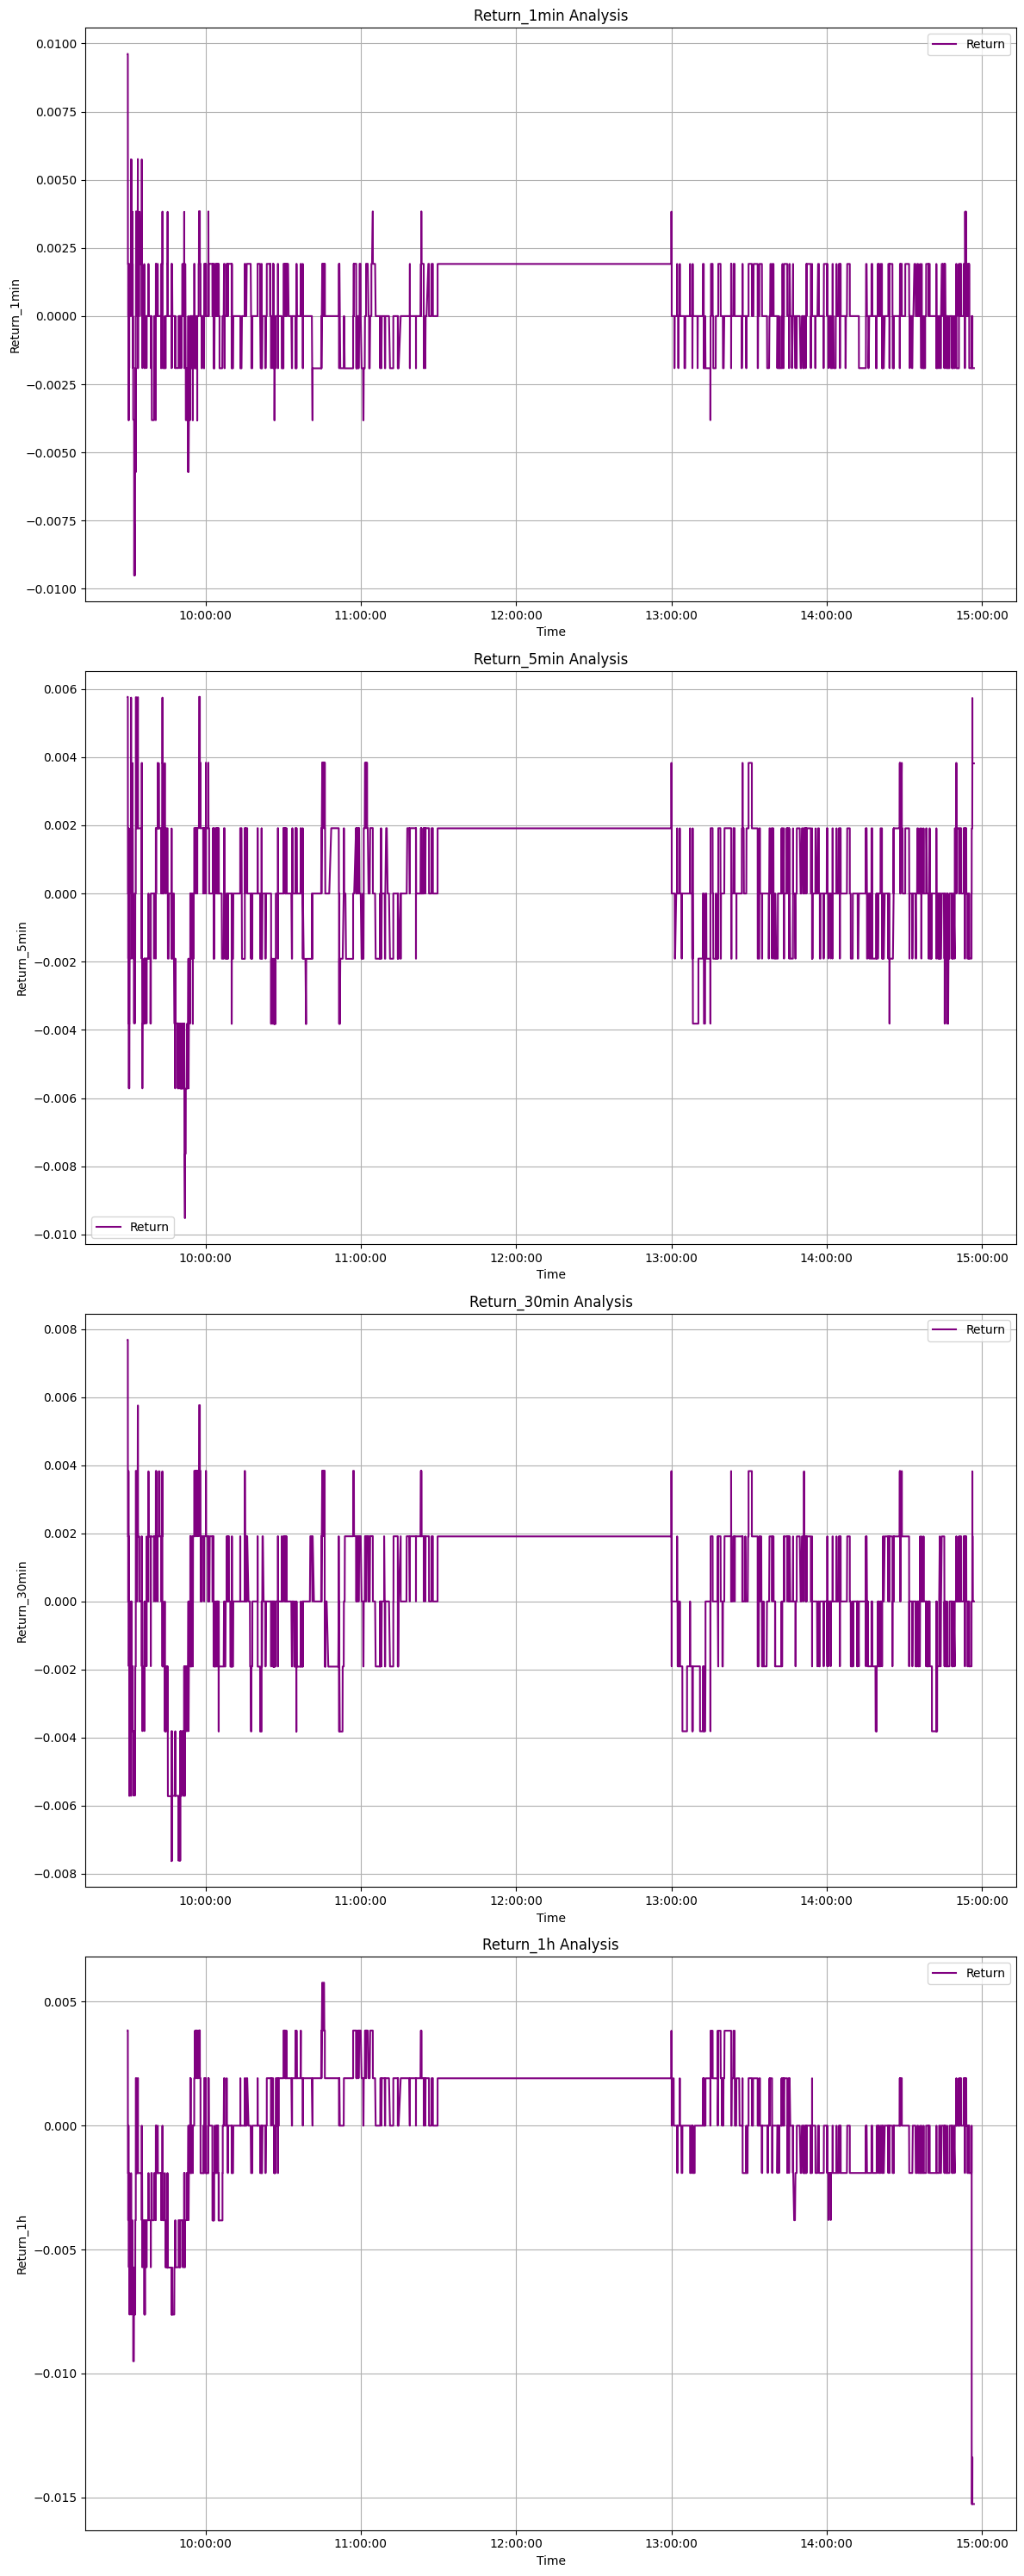

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig3, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 30))


# Price Analysis Plot (top subplot)
ax1.plot(df_filtered['DataTime'], df_filtered['Return_1min'], color='purple', label='Return')
ax1.set_title('Return_1min Analysis')
ax1.set_ylabel('Return_1min')
ax1.set_xlabel('Time')
ax1.legend()
ax1.grid(True)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

ax2.plot(df_filtered['DataTime'], df_filtered['Return_5min'], color='purple', label='Return')
ax2.set_title('Return_5min Analysis')
ax2.set_ylabel('Return_5min')
ax2.set_xlabel('Time')
ax2.legend()
ax2.grid(True)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

ax3.plot(df_filtered['DataTime'], df_filtered['Return_10min'], color='purple', label='Return')
ax3.set_title('Return_30min Analysis')
ax3.set_ylabel('Return_30min')
ax3.set_xlabel('Time')
ax3.legend()
ax3.grid(True)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

ax4.plot(df_filtered['DataTime'], df_filtered['Return_1h'], color='purple', label='Return')
ax4.set_title('Return_1h Analysis')
ax4.set_ylabel('Return_1h')
ax4.set_xlabel('Time')
ax4.legend()
ax4.grid(True)
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.tight_layout()
plt.savefig('return_1min_5min_30min_1h_analysis_intraday.png', dpi=120)
plt.show()

C:\Users\Yu\AppData\Local\Temp\ipykernel_12536\319894438.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  thirty_min_volume_changes = df_filtered['VolumeChange'].abs().resample('30T').sum()  # '30T' = 30 minutes


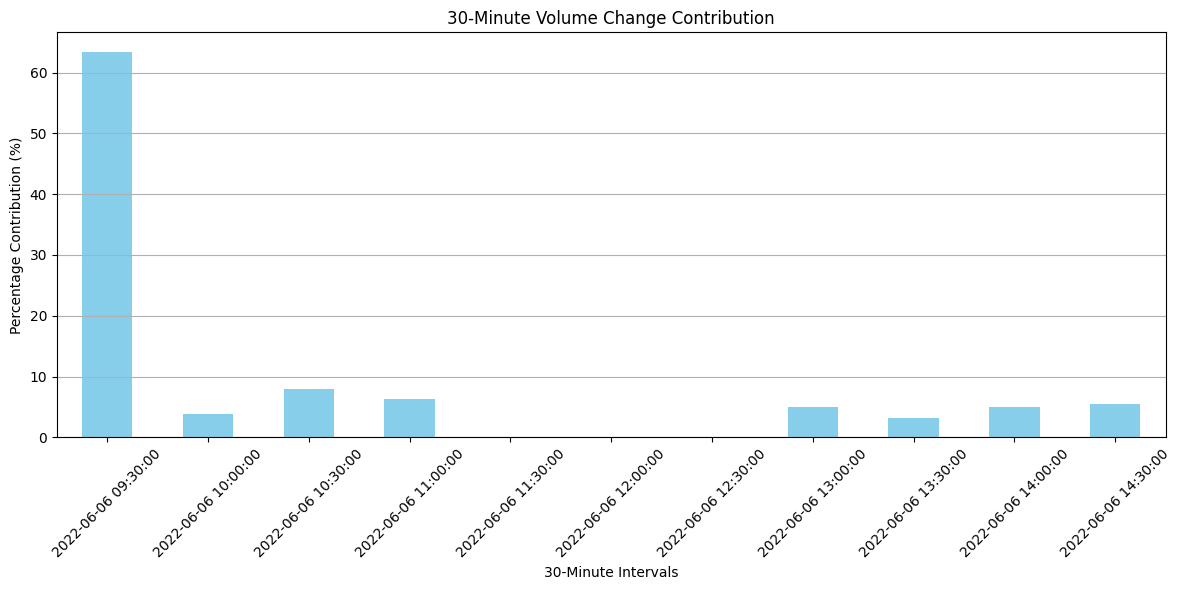

30-Minute Volume Change Contributions:
DataTime
2022-06-06 09:30:00    63.46%
2022-06-06 10:00:00     3.77%
2022-06-06 10:30:00     7.94%
2022-06-06 11:00:00     6.28%
2022-06-06 11:30:00      0.0%
2022-06-06 12:00:00      0.0%
2022-06-06 12:30:00      0.0%
2022-06-06 13:00:00     4.91%
2022-06-06 13:30:00      3.1%
2022-06-06 14:00:00      5.0%
2022-06-06 14:30:00     5.55%
Freq: 30min, Name: VolumeChange, dtype: object


In [10]:
# Calculate 30-minute volume change contributions
df_filtered = df_filtered.set_index(pd.to_datetime(df_filtered['DataTime']))

# Change resample frequency to 30 minutes
thirty_min_volume_changes = df_filtered['VolumeChange'].abs().resample('30T').sum()  # '30T' = 30 minutes

total_volume_change = thirty_min_volume_changes.sum()

if total_volume_change > 0:
    thirty_min_percentages = (thirty_min_volume_changes / total_volume_change) * 100
else:
    thirty_min_percentages = pd.Series(0, index=thirty_min_volume_changes.index)

# Plot with adjusted labels
plt.figure(figsize=(12, 6))
thirty_min_percentages.plot(kind='bar', color='skyblue')
plt.title('30-Minute Volume Change Contribution')
plt.ylabel('Percentage Contribution (%)')
plt.xlabel('30-Minute Intervals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('30_minute_volume_change_contribution_intraday.png', dpi=120)
plt.show()
print("30-Minute Volume Change Contributions:")
print(thirty_min_percentages.round(2).astype(str) + '%')

C:\Users\Yu\AppData\Local\Temp\ipykernel_12536\2386890423.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (x[-1]-x[0])/x[0]


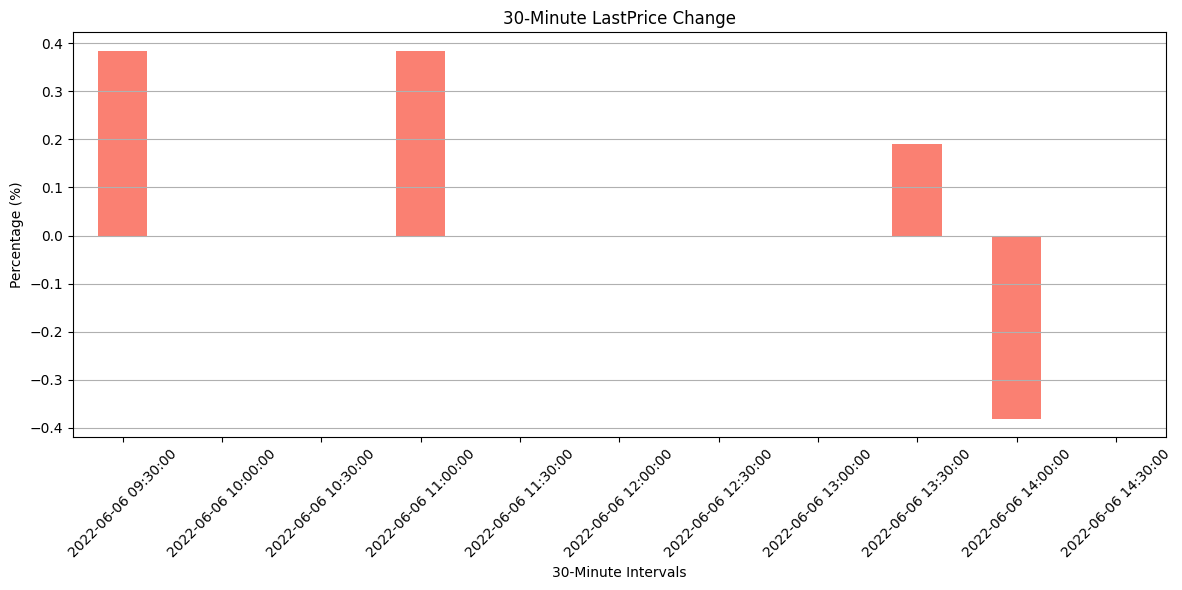

30-Minute Price Change:
DataTime
2022-06-06 09:30:00     0.38%
2022-06-06 10:00:00      0.0%
2022-06-06 10:30:00      0.0%
2022-06-06 11:00:00     0.38%
2022-06-06 11:30:00      0.0%
2022-06-06 12:00:00      0.0%
2022-06-06 12:30:00      0.0%
2022-06-06 13:00:00      0.0%
2022-06-06 13:30:00     0.19%
2022-06-06 14:00:00    -0.38%
2022-06-06 14:30:00      0.0%
Freq: 30min, Name: LastPrice, dtype: object


In [ ]:
# Calculate 30-minute price change percentages
df_filtered = df_filtered.set_index(pd.to_datetime(df_filtered['DataTime']))
def percent_change(x):
    if len(x):
        return (x[-1]-x[0])/x[0]

thirty_price_changes = df_filtered['LastPrice'].resample('30min').apply(percent_change).fillna(0)*100  # Changed to 30min format

# Plot with adjusted labels
plt.figure(figsize=(12, 6))
thirty_price_changes.plot(kind='bar', color='salmon')
plt.title('30-Minute LastPrice Change')
plt.ylabel('Percentage (%)')
plt.xlabel('30-Minute Intervals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('30_minute_lastprice_change_intraday.png', dpi=120)
plt.show()
print("30-Minute Price Change:")
print(thirty_price_changes.round(2).astype(str) + '%')


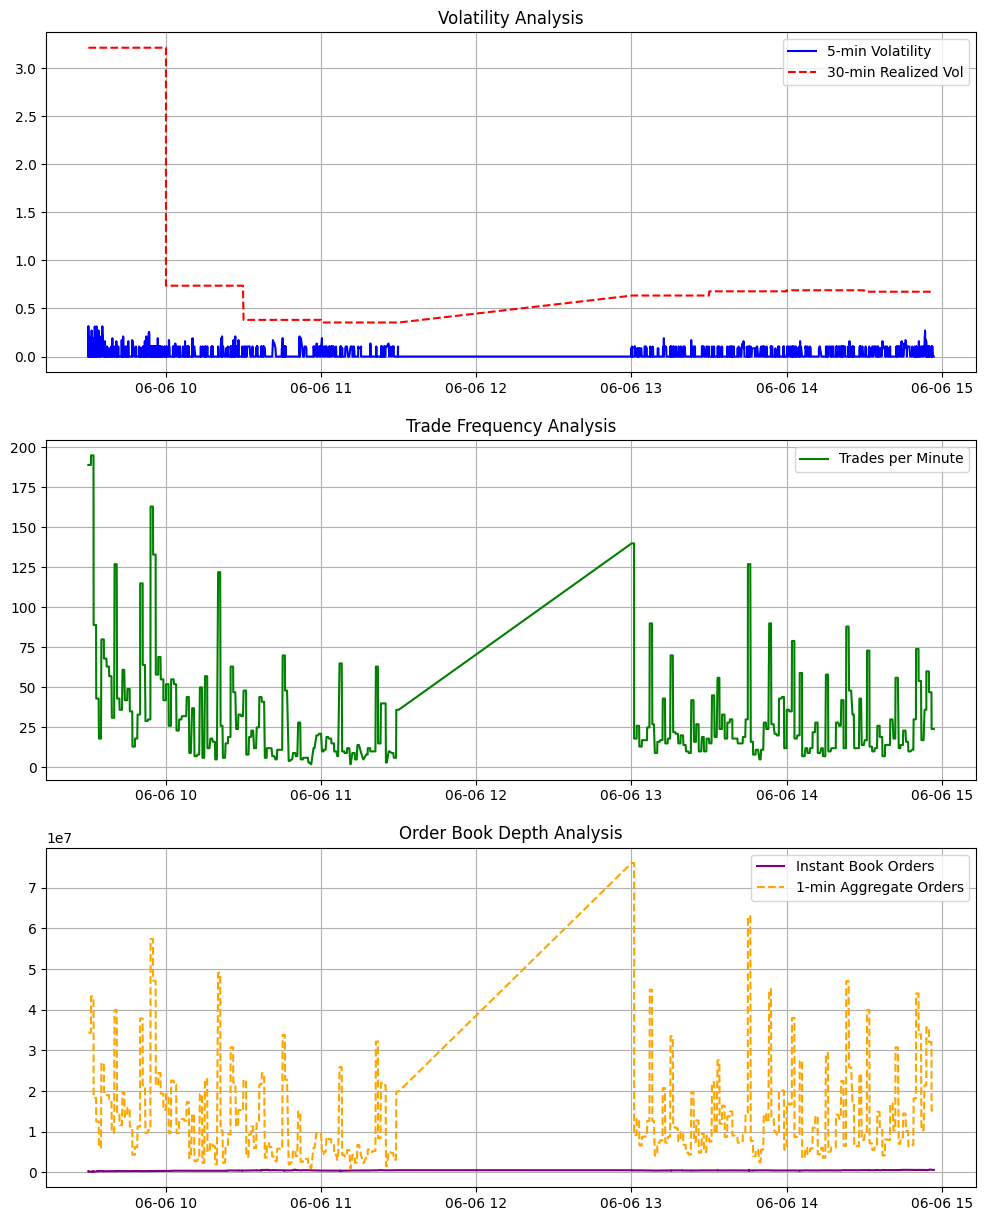

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculate volatility (using 1-minute returns)
df_filtered['Volatility_5min'] = df_filtered['Return_1min'].rolling(window=5, min_periods=1).std() * 100  # 5-minute rolling volatility
df_filtered['RealizedVol_30min'] = df_filtered['Return_1min'].abs().resample('30min').sum().reindex(df_filtered.index, method='ffill')  # 30min realized volatility

# Calculate number of trades (assuming each row represents a trade)
df_filtered['Trades_1min'] = df_filtered.resample('1min', on='DataTime')['Volume'].transform('count')
df_filtered['Trades_5min'] = df_filtered.resample('5min', on='DataTime')['Volume'].transform('count').ffill()

# Calculate number of book orders (sum of all ask/bid volumes)
df_filtered['TotalBookOrders'] = (df_filtered[[f'AskVolume{i}' for i in range(1,11)] + 
                                             [f'BidVolume{i}' for i in range(1,11)]].sum(axis=1))
df_filtered['BookOrders_1min'] = df_filtered.resample('1min', on='DataTime')['TotalBookOrders'].transform('sum').ffill()

# Plot the new metrics
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Volatility Plot
ax1.plot(df_filtered['DataTime'], df_filtered['Volatility_5min'], color='blue', label='5-min Volatility')
ax1.plot(df_filtered['DataTime'], df_filtered['RealizedVol_30min'], color='red', linestyle='--', label='30-min Realized Vol')
ax1.set_title('Volatility Analysis')
ax1.legend()
ax1.grid(True)

# Trade Count Plot
ax2.plot(df_filtered['DataTime'], df_filtered['Trades_1min'], color='green', label='Trades per Minute')
ax2.set_title('Trade Frequency Analysis')
ax2.legend()
ax2.grid(True)

# Book Orders Plot
ax3.plot(df_filtered['DataTime'], df_filtered['TotalBookOrders'], color='purple', label='Instant Book Orders')
ax3.plot(df_filtered['DataTime'], df_filtered['BookOrders_1min'], color='orange', linestyle='--', label='1-min Aggregate Orders')
ax3.set_title('Order Book Depth Analysis')
ax3.legend()
ax3.grid(True)
plt.savefig('volatility_trade_frequency_order_book_depth_analysis_intraday.png', dpi=120)
plt.show()
plt.tight_layout()
plt.show()